In [13]:
pip install opencv-python numpy matplotlib

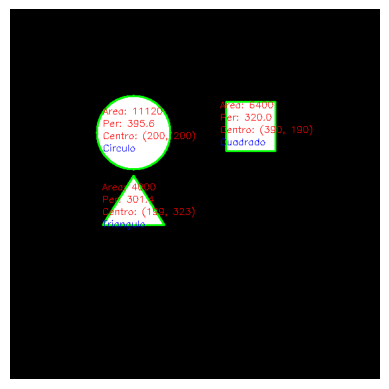

GIF creado como 'animacion.gif'


In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import imageio.v2 as imageio

# 1. Crear imagen si no existe
if not os.path.exists('imagen.png'):
    # Crear lienzo en blanco (600x600, escala de grises)
    img = np.zeros((600, 600), dtype=np.uint8)

    # Círculo (centro en (200, 200), radio 60)
    cv2.circle(img, (200, 200), 60, 255, -1)  # Blanco, relleno

    # Cuadrado (esquina superior izquierda (350, 150), tamaño 80x80)
    cv2.rectangle(img, (350, 150), (430, 230), 255, -1)  # Blanco, relleno

    # Triángulo (vértices definidos manualmente)
    triangle_pts = np.array([[150, 350], [250, 350], [200, 270]], np.int32)
    triangle_pts = triangle_pts.reshape((-1, 1, 2))
    cv2.fillPoly(img, [triangle_pts], 255)  # Blanco, relleno

    # Guardar la imagen creada
    cv2.imwrite('imagen.png', img)
else:
    img = cv2.imread('imagen.png', 0)  # Escala de grises

# 2. Binarizar imagen
_, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# 3. Guardar imagen original (primer frame)
img_original = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
cv2.imwrite('original.png', img_original)

# 4. Detectar contornos
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 5. Copia de la imagen original para dibujar
img_color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

# 6. Etapa 1: Guardar solo contornos
img_contornos = img_color.copy()
for cnt in contours:
    cv2.drawContours(img_contornos, [cnt], -1, (0, 255, 0), 2)
cv2.imwrite('contornos.png', img_contornos)

# 7. Etapa 2: Guardar contornos + métricas (área, perímetro, centroide)
img_metricas = img_contornos.copy()
for cnt in contours:
    # Área
    area = cv2.contourArea(cnt)
    # Perímetro
    perimeter = cv2.arcLength(cnt, True)
    # Centroide
    M = cv2.moments(cnt)
    if M['m00'] != 0:
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
    else:
        cx, cy = 0, 0

    # Etiquetar métricas
    cv2.putText(img_metricas, f'Area: {area:.0f}', (cx-50, cy-30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)
    cv2.putText(img_metricas, f'Per: {perimeter:.1f}', (cx-50, cy-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)
    cv2.putText(img_metricas, f'Centro: ({cx}, {cy})', (cx-50, cy+10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)
cv2.imwrite('metricas.png', img_metricas)

# 8. Etapa 3: Guardar contornos + métricas + clasificación
img_final = img_metricas.copy()
for cnt in contours:
    # Centroide (necesario para posicionar el texto)
    M = cv2.moments(cnt)
    if M['m00'] != 0:
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
    else:
        cx, cy = 0, 0

    # Clasificar forma
    approx = cv2.approxPolyDP(cnt, 0.02 * cv2.arcLength(cnt, True), True)
    if len(approx) == 3:
        shape = "Triangulo"
    elif len(approx) == 4:
        shape = "Cuadrado"
    else:
        shape = "Circulo"
    cv2.putText(img_final, shape, (cx-50, cy+30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)
cv2.imwrite('resultado.png', img_final)

# 9. Mostrar resultado final
plt.imshow(img_final)
plt.axis('off')
plt.show()

# 10. Crear GIF
images = ['original.png', 'contornos.png', 'metricas.png', 'resultado.png']
with imageio.get_writer('animacion.gif', mode='I', duration=1000) as writer:
    for filename in images:
        image = imageio.imread(filename)
        writer.append_data(image)

print("GIF creado como 'animacion.gif'")